# Chapter 3: Describing Data with Statistics

## Finding the Mean

`sum()` 関数と `len()` 関数を使って平均値を計算する。

In [1]:
shortlist = [1, 2, 3]
sum(shortlist)

6

In [2]:
len(shortlist)

3

In [3]:
# Calculating the mean
def calculate_mean(numbers):
    return sum(numbers) / len(numbers)


donations = [100, 60, 70, 900, 100, 200, 500, 500, 503, 600, 1000, 1200]
print(
    "Mean donation over the last {0} days is {1}".format(
        len(donations), calculate_mean(donations)
    )
)

Mean donation over the last 12 days is 477.75


## Finding the Median

In [4]:
samplelist = [4, 1, 3]
samplelist.sort()
samplelist

[1, 3, 4]

In [5]:
# Calculating the median
def calculate_median(numbers):
    s = len(numbers)
    numbers.sort()

    m = s // 2

    if s % 2 == 0:
        median = sum(numbers[m - 1 : m + 1]) / 2
    else:
        median = numbers[m]

    return median

In [6]:
x = list(range(4))

In [7]:
x

[0, 1, 2, 3]

In [8]:
calculate_median(x)

1.5

In [9]:
x = list(range(5))

In [10]:
x

[0, 1, 2, 3, 4]

In [11]:
calculate_median(x)

2

In [12]:
donations = [100, 60, 70, 900, 100, 200, 500, 500, 503, 600, 1000, 1200]
print(
    "Median donation over the last {0} days is {1}".format(
        len(donations), calculate_median(donations)
    )
)

Median donation over the last 12 days is 500.0


## Finding the Mode and Creating a Frequency Table

### collections.Counter オブジェクト

各要素の出現回数をカウントする

In [13]:
from collections import Counter

c = Counter("hello")
type(c)

collections.Counter

`Counter` オブジェクトは、キーにアルファベット、アルファベットの出現頻度を値に持つ、辞書と言える。

In [14]:
c

Counter({'h': 1, 'e': 1, 'l': 2, 'o': 1})

`most_common()` メソッドで、頻度順に並べたリストが得られる。

In [15]:
c.most_common()

[('l', 2), ('h', 1), ('e', 1), ('o', 1)]

`elements()` メソッドを利用すると、逆に `Counter` は希望する出現頻度のリストを生成するのに使える。

In [16]:
list(Counter({"a": 1, "b": 2, "c": 3}).elements())

['a', 'b', 'b', 'c', 'c', 'c']

### Finding the Most Common Elements

`collections.Counter.most_common()` メソッドで、リストの要素を頻度順に並べることができる。

In [17]:
simplelist = [4, 2, 1, 3, 4]
c = Counter(simplelist)
c.most_common()

[(4, 2), (2, 1), (1, 1), (3, 1)]

最頻出の値と出現頻度

In [18]:
c.most_common(1)

[(4, 2)]

In [19]:
c.most_common(2)

[(4, 2), (2, 1)]

最頻値

In [20]:
mode = c.most_common()[0][0]
mode

4

### Finding the Mode

In [21]:
# Calculating the mode
def calculate_mode(numbers):
    return Counter(numbers).most_common()[0][0]


scores = [7, 8, 9, 2, 10, 9, 9, 9, 9, 4, 5, 6, 1, 5, 6, 7, 8, 6, 1, 10]
print("The mode of the list of numbers is: {0}".format(calculate_mode(scores)))

The mode of the list of numbers is: 9


上の実装は最頻値が一つのときだけ有効。最頻値が複数の場合にも対応するように変更する。

In [22]:
# Calculating the mode
def calculate_mode(numbers):
    numbers_freq = Counter(numbers).most_common()
    max_count = numbers_freq[0][1]

    return [i[0] for i in numbers_freq if i[1] == max_count]


scores = scores = [5, 5, 5, 4, 4, 4, 9, 1, 3]
print("The mode of the list of numbers is: {0}".format(calculate_mode(scores)))

The mode of the list of numbers is: [5, 4]


### Creating a Frequency Table

頻度順に並べた度数表

In [23]:
# Frequency table for a list of numbers
def frequency_table(numbers):
    table = Counter(numbers)
    print("Number\tFrequency")
    for number in table.most_common():
        print("{0}\t{1}".format(number[0], number[1]))


scores = [7, 8, 9, 2, 10, 9, 9, 9, 9, 4, 5, 6, 1, 5, 6, 7, 8, 6, 1, 10]
frequency_table(scores)

Number	Frequency
9	5
6	3
7	2
8	2
10	2
5	2
1	2
2	1
4	1


値順に並べた度数表

In [24]:
# Frequency table for a list of numbers
# Enhanced to display the table sorted by the numbers
def frequency_table(numbers):
    table = Counter(numbers).most_common()
    table.sort()
    print("Number\tFrequency")
    for number in table:
        print("{0}\t{1}".format(number[0], number[1]))


scores = [7, 8, 9, 2, 10, 9, 9, 9, 9, 4, 5, 6, 1, 5, 6, 7, 8, 6, 1, 10]
frequency_table(scores)

Number	Frequency
1	2
2	1
4	1
5	2
6	3
7	2
8	2
9	5
10	2


## Measuring the Dispersion

### Finding the Range of a Set of Numbers

In [25]:
# Find the range
def find_range(numbers):
    lowest = min(numbers)
    highest = max(numbers)

    return lowest, highest, highest - lowest


donations = [100, 60, 70, 900, 100, 200, 500, 500, 503, 600, 1000, 1200]
lowest, highest, r = find_range(donations)
print("Lowest: {0} Highest: {1} Range: {2}".format(lowest, highest, r))

Lowest: 60 Highest: 1200 Range: 1140


### Finding the Variance and Standard Deviation

In [26]:
def find_differences(numbers):
    mean = calculate_mean(numbers)
    return [num - mean for num in numbers]


# Find the variance and standard deviation of a list of numbers
def calculate_variance(numbers):
    return sum([x ** 2 for x in find_differences(numbers)]) / len(numbers)


# Distribution1
donations1 = [100, 60, 70, 900, 100, 200, 500, 500, 503, 600, 1000, 1200]
variance = calculate_variance(donations1)

print("The variance of the list of numbers is {0:,.2f}".format(variance))
print(
    "The standard deviation of the list of numbers is {0:,.2f}".format(variance ** 0.5)
)

# Distribution2
donations2 = [382, 389, 377, 397, 396, 368, 369, 392, 398, 367, 393, 396]
variance = calculate_variance(donations2)

print("The variance of the list of numbers is {0:,.2f}".format(variance))
print(
    "The standard deviation of the list of numbers is {0:,.2f}".format(variance ** 0.5)
)

The variance of the list of numbers is 141,047.35
The standard deviation of the list of numbers is 375.56
The variance of the list of numbers is 135.39
The standard deviation of the list of numbers is 11.64


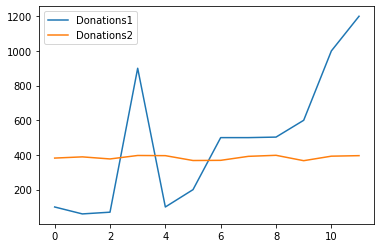

In [27]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(donations1, label="Donations1")
ax.plot(donations2, label="Donations2")
ax.legend()
plt.show()

## Calculating the Correlation Between Two Data Sets

### Calculating the Correlation Coefficient

In [28]:
def find_corr_x_y(x, y):
    n = len(x)

    # inner product
    sum_prod_x_y = sum([xi * yi for xi, yi in zip(x, y)])

    sum_x = sum(x)
    sum_y = sum(y)

    squared_sum_x = sum_x ** 2
    squared_sum_y = sum_y ** 2

    x_square_sum = sum([xi ** 2 for xi in x])
    y_square_sum = sum([yi ** 2 for yi in y])

    return (n * sum_prod_x_y - sum_x * sum_y) / (
        (n * x_square_sum - sum_x ** 2) * (n * y_square_sum - sum_y ** 2)
    ) ** (1 / 2)

### High School Grades and Performance on College Admission Tests

#### High School Grades & College Admission Test Scores

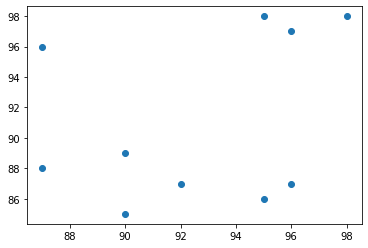

0.3183785775683751

In [29]:
import matplotlib.pyplot as plt

x = [90, 92, 95, 96, 87, 87, 90, 95, 98, 96]
y = [85, 87, 86, 97, 96, 88, 89, 98, 98, 87]

fig, ax = plt.subplots()
ax.scatter(x, y)
plt.show()

find_corr_x_y(x, y)

#### High School Math Grades & College Admission Test Scores

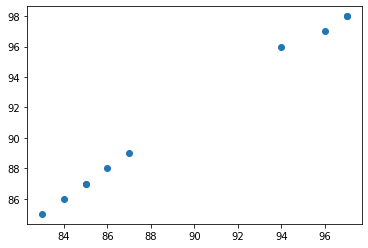

0.9989633063220916

In [30]:
x = [83, 85, 84, 96, 94, 86, 87, 97, 97, 85]
y = [85, 87, 86, 97, 96, 88, 89, 98, 98, 87]

fig, ax = plt.subplots()
ax.scatter(x, y)
plt.show()

find_corr_x_y(x, y)

## Scatter Plots

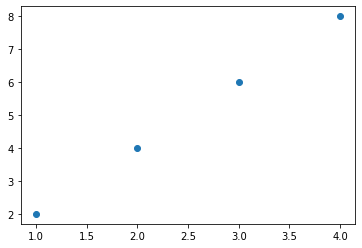

In [31]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4]
y = [2, 4, 6, 8]

fig, ax = plt.subplots()
ax.scatter(x, y)

plt.show()

Anscombe’s Quartet の4つのデータセットは、平均値と標準偏差、相関係数がそれぞれ等しいにもかかわらず、散布図で見てみると様子が全く異なる。

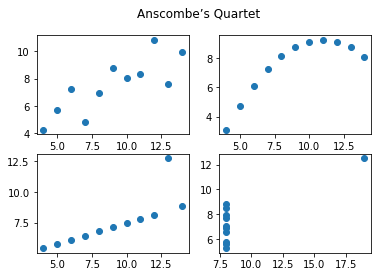

In [32]:
x = [
    [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0],
]
y = [
    [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68],
    [9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74],
    [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73],
    [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89],
]

fig, ax = plt.subplots(2, 2)

for xi, yi, ax in zip(x, y, ax.flatten()):
    ax.scatter(xi, yi)

fig.suptitle("Anscombe’s Quartet")
fig.savefig("chap3_anscombes-quartet.png")
plt.show()

In [33]:
for xi, yi in zip(x, y):
    print("{0:.3f}".format(find_corr_x_y(xi, yi)))

0.816
0.816
0.816
0.817


## Reading Data from Files

### Reading Data from a Text File

In [34]:
# Find the sum of numbers stored in a file
def sum_data(filename):
    s = 0

    with open(filename) as f:
        for line in f:
            s += float(line)

    print("Sum of the numbers: {0}".format(s))


sum_data("chap3_mydata.txt")

Sum of the numbers: 5733.0


In [35]:
# Calculating the mean of numbers stored in a file
def read_data(filename):
    with open(filename) as f:
        numbers = [float(line) for line in f]
        return numbers


print("Mean: {0}".format(calculate_mean(read_data("chap3_mydata.txt"))))

Mean: 477.75


### Reading Data from a CSV File

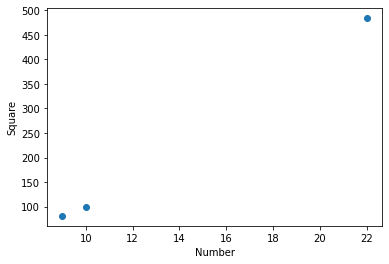

0.9996251875470692

In [36]:
import csv


def read_csv(filename):
    with open(filename) as f:
        reader = csv.reader(f)
        next(reader)
        data = [row for row in reader]
        return [float(row[0]) for row in data], [float(row[1]) for row in data]


numbers, squared = read_csv("chap3_numbers.csv")

fig, ax = plt.subplots()
ax.scatter(numbers, squared)
ax.set_xlabel("Number")
ax.set_ylabel("Square")
plt.show()

find_corr_x_y(numbers, squared)

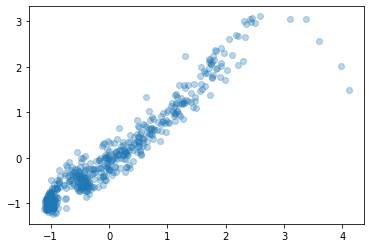

0.9605138954331739

In [37]:
def read_csv(filename):
    with open(filename) as f:
        reader = csv.reader(f)
        next(reader)
        data = [row for row in reader]
        return [float(row[1]) for row in data], [float(row[2]) for row in data]


summer, highest_correlated = read_csv("chap3_correlate-summer.csv")

fig, ax = plt.subplots()
ax.scatter(summer, highest_correlated, alpha=0.3)
plt.show()

find_corr_x_y(summer, highest_correlated)